# Setup

In [1]:
from utils import *

In [ ]:
jtplot_style()

Load Data

In [2]:
data = feather.read_dataframe(DIR_DATA / 'train.ft')
data_test = feather.read_dataframe(DIR_DATA / 'test.ft')

Identify categorical and continuous variables

In [3]:
cat_vars, contin_vars

(['Store',
  'DayOfWeek',
  'Year',
  'Month',
  'Day',
  'StateHoliday',
  'CompetitionMonthsOpen',
  'Promo2Weeks',
  'StoreType',
  'Assortment',
  'PromoInterval',
  'CompetitionOpenSinceYear',
  'Promo2SinceYear',
  'State',
  'Week',
  'Events',
  'Promo_fw',
  'Promo_bw',
  'StateHoliday_fw',
  'StateHoliday_bw',
  'SchoolHoliday_fw',
  'SchoolHoliday_bw'],
 ['CompetitionDistance',
  'Max_TemperatureC',
  'Mean_TemperatureC',
  'Min_TemperatureC',
  'Max_Humidity',
  'Mean_Humidity',
  'Min_Humidity',
  'Max_Wind_SpeedKm_h',
  'Mean_Wind_SpeedKm_h',
  'CloudCover',
  'trend',
  'trend_DE',
  'AfterStateHoliday',
  'BeforeStateHoliday',
  'Promo',
  'SchoolHoliday'])

In [4]:
n = len(data); n

844338

Process the Dataframe

In [5]:
idxs = get_cv_idxs(n, val_pct=150000 / n)
data = data.iloc[idxs].set_index('Date')
samp_size = len(data); samp_size

150000

In [5]:
"""
samp_size = n
data.set_index('Date', inplace=True)
"""

In [6]:
data.head()

Store DayOfWeek  Year Month Day StateHoliday CompetitionMonthsOpen  \
Date                                                                            
2015-06-16   257         2  2015     6  16        False                    24   
2013-10-30     4         3  2013    10  30        False                    24   
2014-11-05   593         3  2014    11   5        False                    24   
2013-06-19  1026         3  2013     6  19        False                    24   
2014-04-28    19         1  2014     4  28        False                     0   

           Promo2Weeks StoreType Assortment  ...   Max_Wind_SpeedKm_h  \
Date                                         ...                        
2015-06-16           0         a          a  ...                 18.0   
2013-10-30           0         c          c  ...                 29.0   
2014-11-05           0         a          c  ...                 14.0   
2013-06-19          25         c          a  ...                 26.0   
2014-04-28          25         a          c  ...                 13.0   

           Mean_Wind_SpeedKm_h CloudCover trend trend_DE AfterStateHoliday  \
Date                                                                         
2015-06-16                 8.0        6.0  63.0     71.0              22.0   
2013-10-30                16.0        2.0  74.0     66.0              27.0   
2014-11-05                 8.0        7.0  75.0     71.0              33.0   
2013-06-19                10.0        6.0  58.0     59.0              20.0   
2014-04-28                 6.0        6.0  74.0     71.0               7.0   

           BeforeStateHoliday Promo SchoolHoliday  Sales  
Date                                                      
2015-06-16                0.0   1.0           0.0   5934  
2013-10-30              -56.0   0.0           0.0   7800  
2014-11-05              -50.0   1.0           0.0   9111  
2013-06-19             -106.0   1.0           0.0   7831  
2014-04-28               -3.0   1.0           0.0  10046  

[5 rows x 39 columns]

In [7]:
df, y, nas, mapper = proc_df(data, 'Sales', do_scale=True)
yl = np.log(y)

In [8]:
data_test.set_index('Date', inplace=True)

In [9]:
df_test, _, nas, mapper = proc_df(data_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [10]:
df.head()

Store  DayOfWeek  Year  Month  Day  StateHoliday  \
Date                                                           
2015-06-16    257          2     3      6   16             1   
2013-10-30      4          3     1     10   30             1   
2014-11-05    593          3     2     11    5             1   
2013-06-19   1026          3     1      6   19             1   
2014-04-28     19          1     2      4   28             1   

            CompetitionMonthsOpen  Promo2Weeks  StoreType  Assortment  \
Date                                                                    
2015-06-16                     25            1          1           1   
2013-10-30                     25            1          3           3   
2014-11-05                     25            1          1           3   
2013-06-19                     25           26          3           1   
2014-04-28                      1           26          1           3   

                ...        Min_Humidity  Max_Wind_SpeedKm_h  \
Date            ...                                           
2015-06-16      ...           -0.756430           -0.519502   
2013-10-30      ...           -0.095984            0.704530   
2014-11-05      ...            2.190178           -0.964604   
2013-06-19      ...           -0.705627            0.370703   
2014-04-28      ...           -0.604020           -1.075880   

            Mean_Wind_SpeedKm_h  CloudCover     trend  trend_DE  \
Date                                                              
2015-06-16            -0.651394    0.413263 -0.194358  0.487305   
2013-10-30             0.700532   -1.400579  0.769911 -0.026011   
2014-11-05            -0.651394    0.866723  0.857571  0.487305   
2013-06-19            -0.313412    0.413263 -0.632662 -0.744655   
2014-04-28            -0.989375    0.413263  0.769911  0.487305   

            AfterStateHoliday  BeforeStateHoliday     Promo  SchoolHoliday  
Date                                                                        
2015-06-16          -0.525077            1.128737  1.115768      -0.489079  
2013-10-30          -0.363976           -0.591499 -0.896244      -0.489079  
2014-11-05          -0.170655           -0.407188  1.115768      -0.489079  
2013-06-19          -0.589517           -2.127424  1.115768      -0.489079  
2014-04-28          -1.008379            1.036582  1.115768      -0.489079  

[5 rows x 38 columns]

In [11]:
train_ratio = 0.75
train_size = int(samp_size * train_ratio)
val_idx = list(range(train_size, len(df)))

In [12]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

# Train

In [13]:
max_log_y = np.max(yl)
y_range = (0, max_log_y * 1.2)

In [14]:
md = ColumnarModelData.from_data_frame(DIR_CHECKPOINTS, val_idx, df, yl.astype(np.float32),
                                      cat_flds=cat_vars, bs=128, test_df=df_test)

In [15]:
cat_sz = [(c, len(data[c].cat.categories) + 1) for c in cat_vars]; cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

In [16]:
emb_szs = [(c, min(50, (c + 1) // 2)) for _, c in cat_sz]; emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [17]:
model = md.get_learner(emb_szs, len(contin_vars), emb_drop=0.04, out_sz=1, szs=[1000, 500],
                       drops=[0.001, 0.01], y_range=y_range)
model.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 50]),
                           ('trainable', True),
                           ('nb_params', 55800)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 4]),
                           ('trainable', True),
                           ('nb_params', 32)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 8)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 7]),
                           ('trainable', True),
                           ('nb_params', 91)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1])

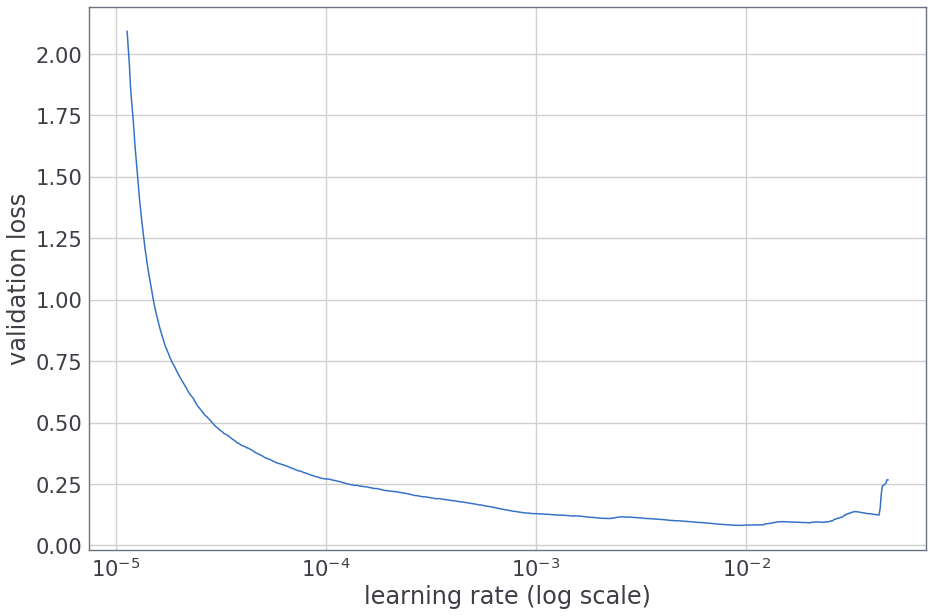

In [20]:
model.lr_find()
model.sched.plot()

In [21]:
lr = 1e-3

In [22]:
model.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.026125   0.025027   0.152994  
    1      0.020944   0.023169   0.13967                         
    2      0.018525   0.027592   0.148642                        



[array([0.02759]), 0.14864192957861105]

In [23]:
model.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.012209   0.018674   0.124319  
    1      0.011644   0.017074   0.119826                        
    2      0.010565   0.016881   0.119072                        
    3      0.010486   0.016813   0.119065                        
    4      0.009978   0.015918   0.116951                         



[array([0.01592]), 0.11695132062806923]

In [24]:
model.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.012084   0.01605    0.118528  
    1      0.01028    0.019321   0.126246                        
    2      0.008497   0.013472   0.111201                         
    3      0.007156   0.014789   0.113737                         
    4      0.010578   0.015272   0.116672                        
    5      0.008772   0.012743   0.111467                         
    6      0.007264   0.014751   0.113628                         
    7      0.006157   0.013808   0.111263                         



[array([0.01381]), 0.11126301803466249]

In [25]:
model.save(DIR_CHECKPOINTS / 'model.pt')

# Predict

In [26]:
preds = model.predict(is_test=True)
preds = np.exp(preds)

In [27]:
data_test['Sales'] = preds

In [28]:
data_test[['Id', 'Sales']].to_csv(DIR_CHECKPOINTS / 'submission.csv', index=False)

In [29]:
with workdir(DIR_CHECKPOINTS):
    !gzip submission.csv
    !kaggle competitions submit {COMPETITION} -f submission.csv.gz -m "Initial Submission"
    !rm submission.csv.gz

100%|████████████████████████████████████████| 275k/275k [00:05<00:00, 56.0kB/s]
Successfully submitted to Rossmann Store Sales